# Task 1 & 2 - Downloading and Loading the Dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_csv("abalone.csv")

In [8]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
df.shape

(4177, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 277.4+ KB


# Task - 3 Visualization

### 1.Univariate Analysis

(array([  13.,   66.,  180.,  344.,  513.,  812., 1017.,  934.,  275.,
          23.]),
 array([0.055 , 0.1145, 0.174 , 0.2335, 0.293 , 0.3525, 0.412 , 0.4715,
        0.531 , 0.5905, 0.65  ]),
 <BarContainer object of 10 artists>)

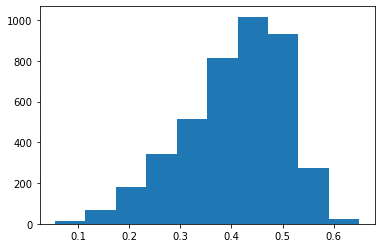

In [11]:
plt.hist(df['Diameter'])

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

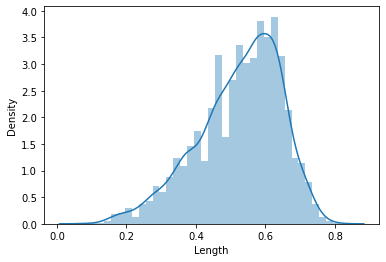

In [12]:
sns.distplot(df['Length'])

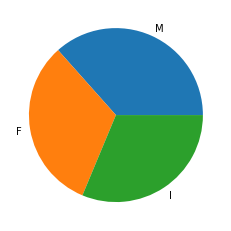

In [13]:
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].unique())
plt.show()

### 2. Bi-Variate Analysis

<AxesSubplot:xlabel='Diameter', ylabel='Height'>

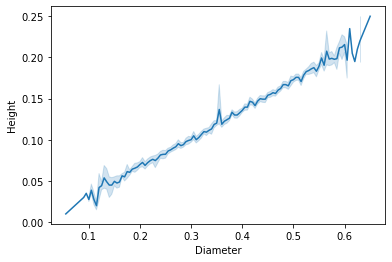

In [14]:
sns.lineplot(x=df.Diameter,y=df.Height)

<BarContainer object of 4177 artists>

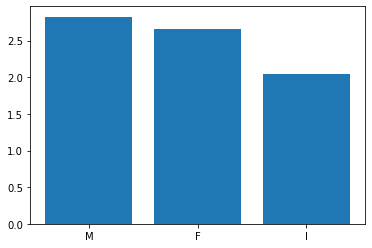

In [15]:
plt.bar(df.Sex, df['Whole weight'])

### 3. Multi-Variate Analysis

<AxesSubplot:>

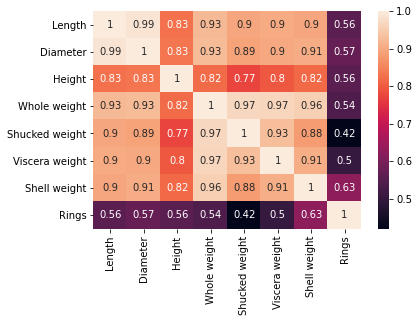

In [16]:
sns.heatmap(df.corr(),annot=True)

# Task 4 - Descriptive Statistics

In [17]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Task 5 - Handle Missing Values

In [18]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [19]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Task 6 - Find Outliers and Replacing

<AxesSubplot:xlabel='Rings'>

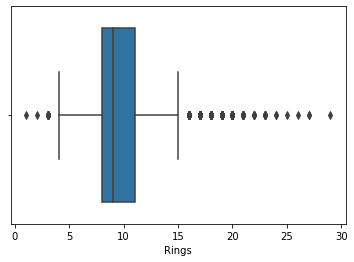

In [20]:
sns.boxplot(x=df['Rings'])

<AxesSubplot:xlabel='Diameter'>

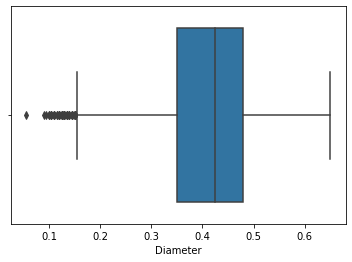

In [21]:
sns.boxplot(x=df['Diameter'])

In [26]:
for col in df.columns:
    if(((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):

        q2 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q2
        upper_limit = q3 + 1.5*IQR
        lower_limit = q2 - 1.5*IQR

        df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
        df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

# Task - 7 Categorical Columns and Perform Encoding

In [28]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [29]:
print(df.Sex.unique())

['M' 'F' 'I']


In [30]:
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)

In [31]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


# Task - 8 Split the Data into Dependent and Independent Variables

In [32]:
y = df['Rings']
X = df.drop('Rings', axis=1)

In [33]:
y

0       15.0
1        7.0
2        9.0
3       10.0
4        7.0
        ... 
4172    11.0
4173    10.0
4174     9.0
4175    10.0
4176    12.0
Name: Rings, Length: 4177, dtype: float64

In [35]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


# Task - 9 Scale the Independent Variables

In [36]:
scaled_X = pd.DataFrame(scale(X), columns=X.columns)
scaled_X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.151980,-0.583117,-0.440884,-1.158093,-0.644740,-0.614985,-0.730304,-0.645184
1,1.151980,-1.465694,-1.459762,-1.288751,-1.238208,-1.191637,-1.213890,-1.231390
2,-1.280690,0.047295,0.119499,-0.112828,-0.309436,-0.467362,-0.357253,-0.205531
3,1.151980,-0.709200,-0.440884,-0.374145,-0.640626,-0.656504,-0.610559,-0.608547
4,-0.064355,-1.633804,-1.561650,-1.550067,-1.280378,-1.237770,-1.296790,-1.341303
...,...,...,...,...,...,...,...,...
4172,-1.280690,0.341487,0.425163,0.671120,0.122550,0.056238,0.540835,0.080244
4173,1.151980,0.551624,0.323275,-0.112828,0.285059,0.374550,0.315162,0.164511
4174,1.151980,0.635679,0.679882,1.716385,0.717046,0.773593,0.987576,0.512571
4175,-1.280690,0.845817,0.781770,0.279146,0.549394,0.798966,0.743480,0.424640


# Task - 10 Split the Data into Training and Testing

In [37]:
x_train, x_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=0)

In [38]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2923, 8) (1254, 8) (2923,) (1254,)


# Task - 11 Build the Model

In [41]:
lr = LinearRegression()

# Task - 12 Train the Model

In [42]:
lr.fit(x_train, y_train)

LinearRegression()

# Task - 13 Test the Model

In [43]:
y_pred = lr.predict(x_test)
y_pred

array([12.55446979,  9.47758181, 10.25463091, ...,  7.9886076 ,
       17.03108659, 11.51225618])